# CSGO - Proyecto

## I. Entendimiento de la data y negocio

### 1. Análisis exploratorio de los datos

In [33]:
# Carga de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
# Carga correcta con separador ;
df = pd.read_csv("CSGO.csv", sep=";")

# Ver primeras filas
df.head()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,...,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
0,600,de_inferno,Terrorist,1,4,1,76561198036987787,False,True,False,...,0,0,0,750,4400,0,0,0,0,501379.183091
1,601,de_inferno,Terrorist,1,4,1,76561197971812216,False,True,False,...,0,0,0,800,4400,0,0,0,0,208807.587297
2,602,de_inferno,Terrorist,1,4,1,76561197972240652,False,True,False,...,0,0,0,1000,4400,0,0,0,0,381652.027911
3,603,de_inferno,Terrorist,1,4,1,76561197975824962,False,True,False,...,0,0,0,850,4400,0,0,0,0,289754.503091
4,604,de_inferno,Terrorist,1,4,1,76561197960331095,False,True,True,...,0,0,0,1000,4400,0,0,0,0,254527.691176


In [5]:
# Info general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79157 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   SteamId                      79157 non-null  int64  
 7   RoundWinner                  79157 non-null  bool   
 8   MatchWinner                  79157 non-null  bool   
 9   Survived                     79157 non-null  bool   
 10  AbnormalMatch                79157 non-null  bool   
 11  TimeAlive                    79157 non-null  float64
 12  ScaledTimeAlive              79157 non-null  float64
 13  AvgCentroidDista

In [6]:
# Cantidad de nulos por columna
df.isnull().sum()

Unnamed: 0                     0
Map                            0
Team                           0
InternalTeamId                 0
MatchId                        0
RoundId                        0
SteamId                        0
RoundWinner                    0
MatchWinner                    0
Survived                       0
AbnormalMatch                  0
TimeAlive                      0
ScaledTimeAlive                0
AvgCentroidDistance            0
TravelledDistance              0
AvgRoundVelocity               0
AvgKillDistance                0
AvgSiteDistance                0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStart

In [7]:
# Estadísticas descriptivas
df.describe()

,Unnamed: 0,InternalTeamId,MatchId,RoundId,SteamId,TimeAlive,ScaledTimeAlive,AvgCentroidDistance,TravelledDistance,AvgRoundVelocity,...,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
count,79157.000000,79157.000000,79157.000000,79157.000000,7.915700e+04,79157.000000,79157.000000,7.915700e+04,7.915700e+04,79157.000000,...,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,7.915700e+04
mean,60570.193640,1.500006,250.525033,12.765517,7.656120e+16,72.795720,0.829561,1.122538e+06,1.041888e+05,84.351773,...,0.146178,0.301553,0.095633,3778.108695,18890.133532,8.511578,1.209912,1.874831,3.858484,6.288927e+05
std,36436.598386,0.500003,149.557804,7.432837,3.342137e+07,48.321035,0.210842,1.134700e+06,3.543487e+05,171.890139,...,0.385601,0.578843,0.320641,2111.285406,9743.203024,6.195079,1.435150,1.824027,3.246752,3.402574e+05
min,600.000000,1.000000,4.000000,1.000000,7.656120e+16,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,30830.000000,1.000000,128.000000,6.000000,7.656120e+16,47.080072,0.698892,2.578825e+05,5.898255e+04,56.202641,...,0.000000,0.000000,0.000000,1600.000000,10900.000000,3.000000,0.000000,0.000000,1.000000,4.097790e+05
50%,56720.000000,2.000000,236.000000,12.000000,7.656120e+16,69.239615,0.922777,7.409804e+05,8.601557e+04,83.617316,...,0.000000,0.000000,0.000000,4700.000000,22550.000000,8.000000,1.000000,1.000000,3.000000,5.542432e+05
75%,90639.000000,2.000000,373.000000,19.000000,7.656120e+16,92.647813,1.000000,1.753172e+06,1.213966e+05,104.131144,...,0.000000,0.000000,0.000000,5200.000000,26050.000000,13.000000,2.000000,3.000000,6.000000,7.524568e+05
max,123779.000000,2.000000,511.000000,36.000000,7.656120e+16,2990.560394,2.000000,2.202346e+07,3.964645e+07,24111.819781,...,4.000000,5.000000,5.000000,8850.000000,36150.000000,41.000000,11.000000,14.000000,22.000000,5.170168e+06


- Cantidad de filas: 79.157 registros
- Cantidad de columnas: 37 columnas
- No hay nulos → todas las columnas tienen 79.157 datos


Variables:

1) Categóricas: Map, Team, RoundWinner, MatchWinner, Survived, AbnormalMatch
2) ID / claves: MatchId, RoundId, SteamId, InternalTeamId
3) Métricas numéricas continuas: TimeAlive, ScaledTimeAlive, TravelledDistance, AvgRoundVelocity, AvgKillDistance, etc.
4) Métricas de combate: RoundKills, RoundAssists, RoundHeadshots, RoundFlankKills, MatchKills, etc.
5) Variables de equipo: RoundStartingEquipmentValue, TeamStartingEquipmentValue`

*EL DATASET ES DE JUGADORES DE CSGO, POR RONDA.*

In [8]:
# Tamaño por defecto de los plots
plt.rcParams['figure.figsize'] = (12, 6)

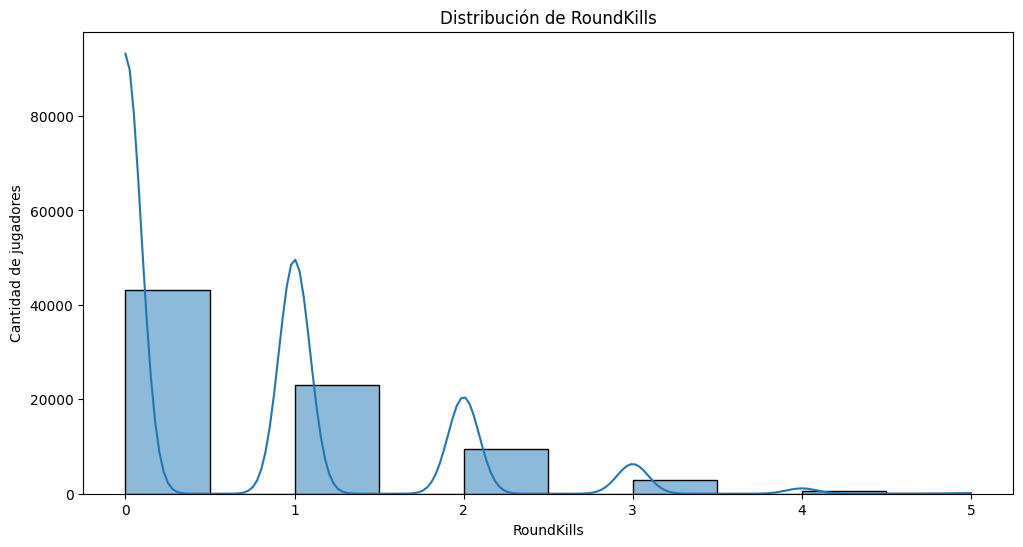

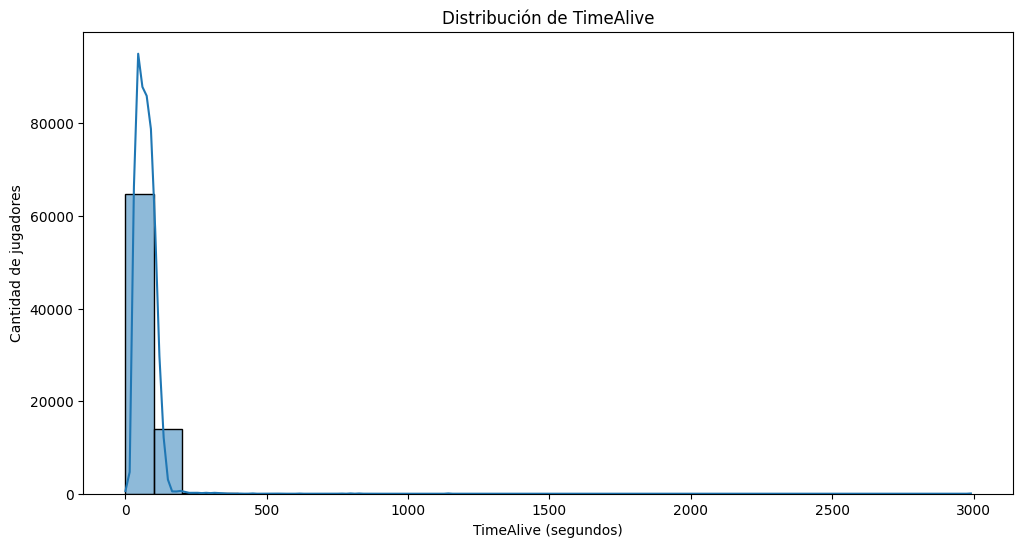

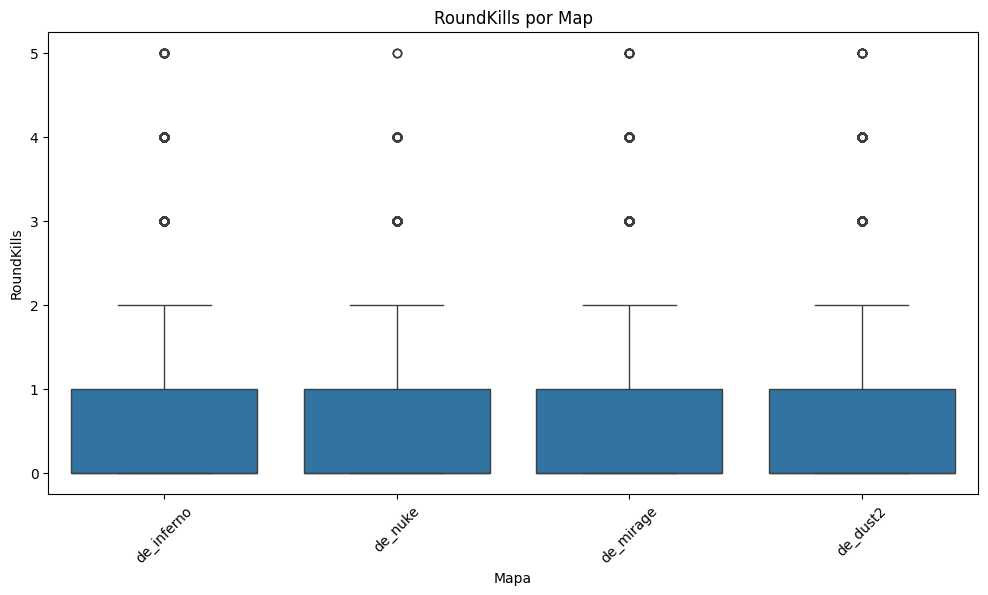

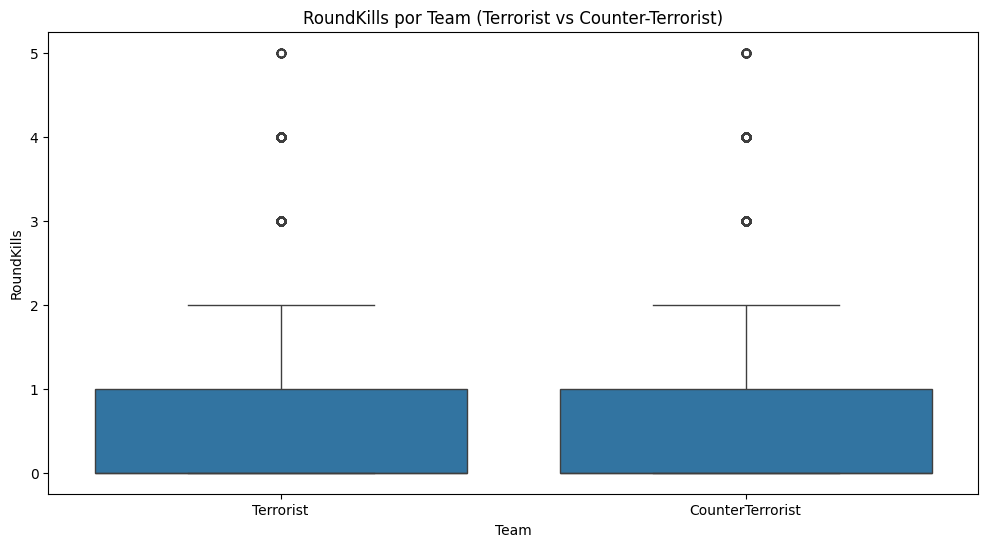

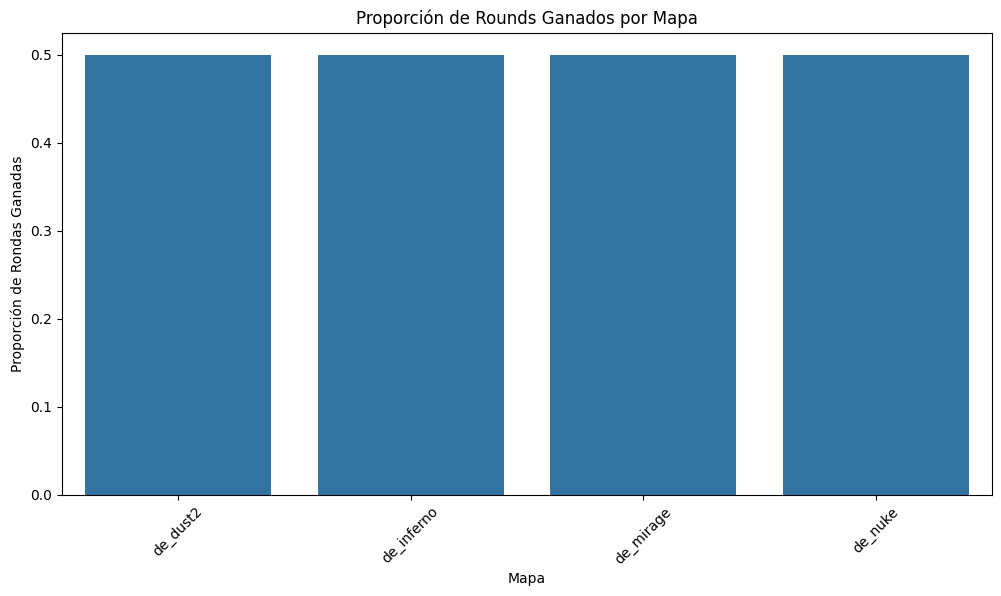

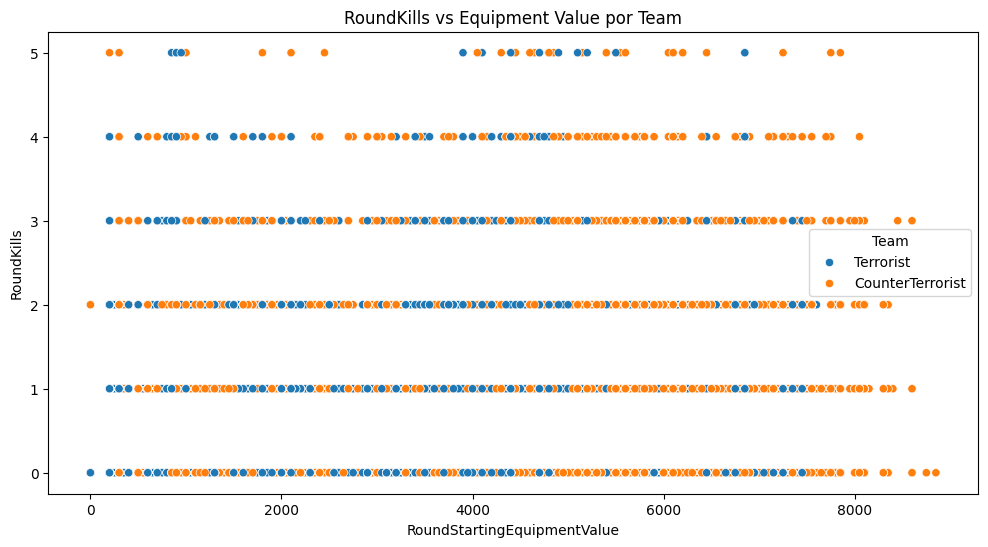

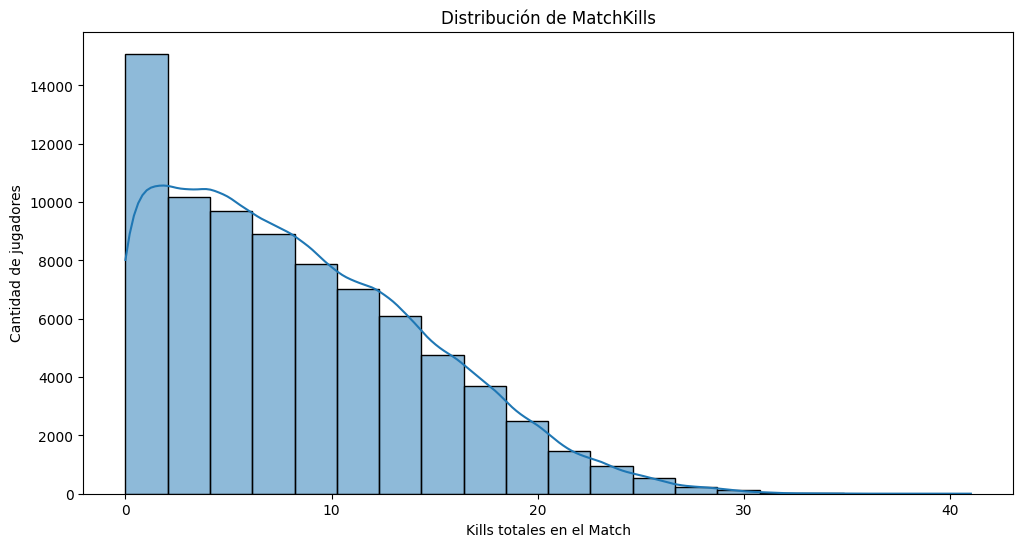

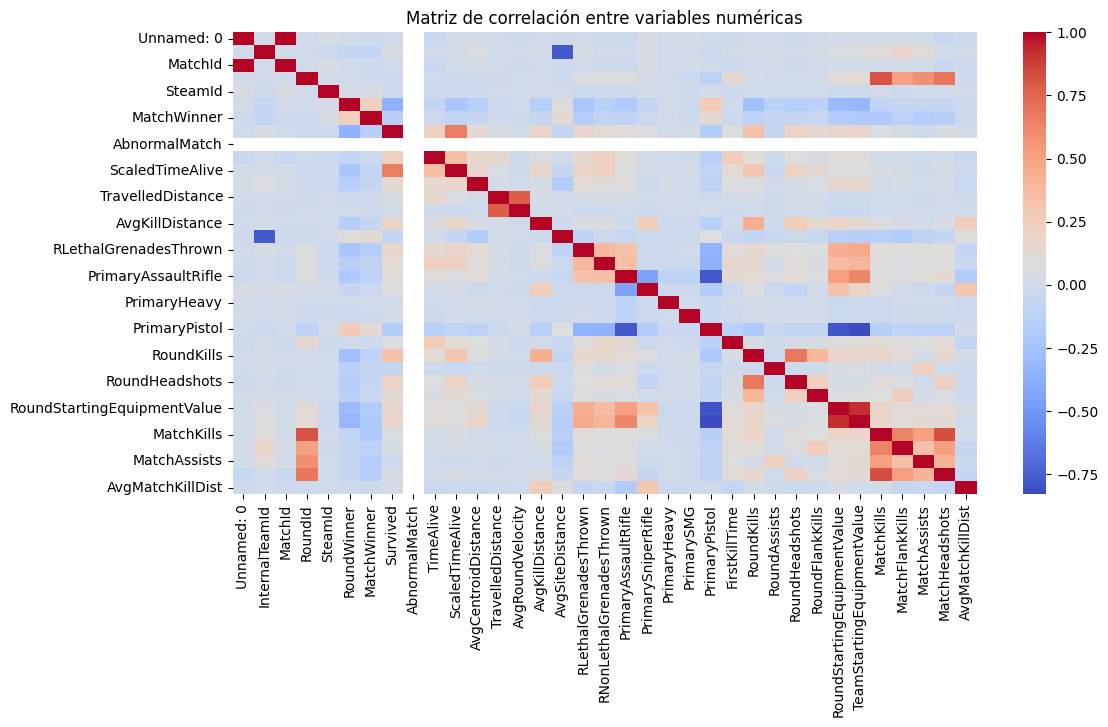

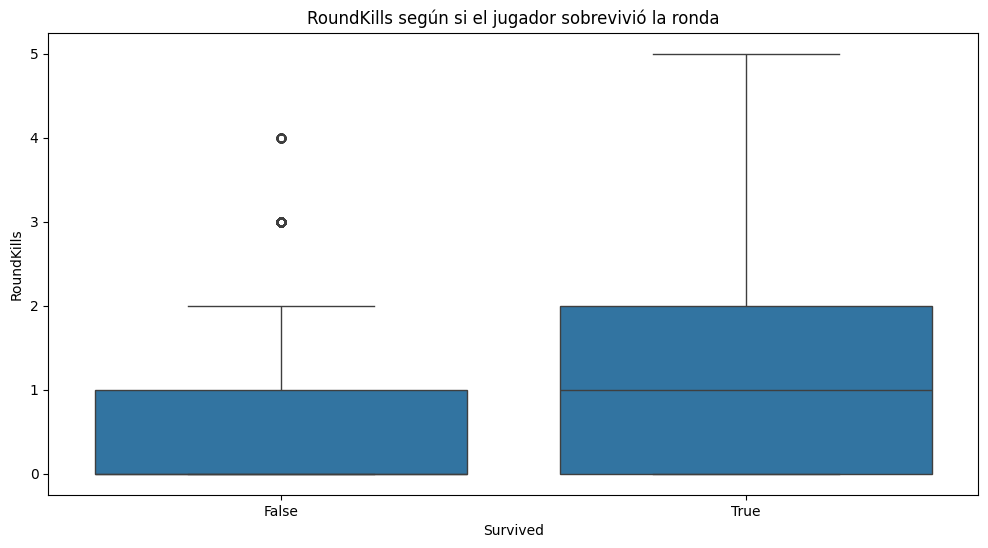

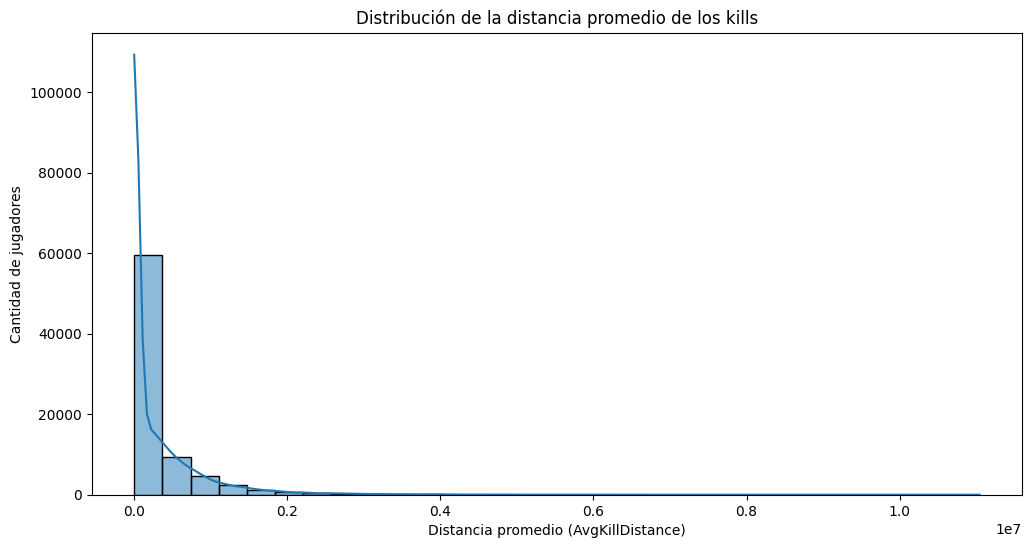

In [9]:
# Histograma de RoundKills
sns.histplot(df['RoundKills'], bins=10, kde=True)
plt.title('Distribución de RoundKills')
plt.xlabel('RoundKills')
plt.ylabel('Cantidad de jugadores')
plt.show()

# Histograma de TimeAlive
sns.histplot(df['TimeAlive'], bins=30, kde=True)
plt.title('Distribución de TimeAlive')
plt.xlabel('TimeAlive (segundos)')
plt.ylabel('Cantidad de jugadores')
plt.show()

# Comparación de RoundKills por Map
sns.boxplot(data=df, x='Map', y='RoundKills')
plt.title('RoundKills por Map')
plt.xlabel('Mapa')
plt.ylabel('RoundKills')
plt.xticks(rotation=45)
plt.show()

# Distribución de kills por Team (Terrorist vs Counter-Terrorist)
sns.boxplot(data=df, x='Team', y='RoundKills')
plt.title('RoundKills por Team (Terrorist vs Counter-Terrorist)')
plt.show()

# Proporción de rounds ganados por mapa (usando RoundWinner)
rounds_won_by_map = df.groupby('Map')['RoundWinner'].mean().reset_index()

sns.barplot(data=rounds_won_by_map, x='Map', y='RoundWinner')
plt.title('Proporción de Rounds Ganados por Mapa')
plt.ylabel('Proporción de Rondas Ganadas')
plt.xlabel('Mapa')
plt.xticks(rotation=45)
plt.show()

# Relación entre Equipment Value y RoundKills
sns.scatterplot(data=df, x='RoundStartingEquipmentValue', y='RoundKills', hue='Team')
plt.title('RoundKills vs Equipment Value por Team')
plt.show()

# Distribución de MatchKills (kills totales por jugador en todo el match)
sns.histplot(df['MatchKills'], bins=20, kde=True)
plt.title('Distribución de MatchKills')
plt.xlabel('Kills totales en el Match')
plt.ylabel('Cantidad de jugadores')
plt.show()

# Matriz de correlación
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

# Comparación de RoundKills según si el jugador sobrevive o no la ronda (Survived)
sns.boxplot(data=df, x='Survived', y='RoundKills')
plt.title('RoundKills según si el jugador sobrevivió la ronda')
plt.show()

# Distribución de AvgKillDistance (distancia promedio de los kills)
sns.histplot(df['AvgKillDistance'], bins=30, kde=True)
plt.title('Distribución de la distancia promedio de los kills')
plt.xlabel('Distancia promedio (AvgKillDistance)')
plt.ylabel('Cantidad de jugadores')
plt.show()


**1) Distribución de RoundKills**  
La gran mayoría de los jugadores no obtiene eliminaciones en la ronda (valor 0), seguido de aquellos que logran 1 o 2 kills. La probabilidad de realizar más de 3 kills es baja, como es esperable en un contexto competitivo.

**2) Distribución de TimeAlive**  
La mayor parte de los jugadores sobrevive menos de 100 segundos por ronda, mostrando una distribución asimétrica hacia la izquierda. Se observan pocos casos extremos de supervivencia prolongada.

**3) RoundKills por Map**  
La mediana de kills por mapa es relativamente estable entre los escenarios analizados (`de_inferno`, `de_nuke`, `de_mirage`, `de_dust2`), con presencia de outliers en todos los casos. No se identifican diferencias significativas de desempeño atribuibles al mapa.

**4) RoundKills por Team**  
Ambos equipos, Terrorist y Counter-Terrorist, presentan una distribución similar en cuanto a kills por ronda, sin evidenciarse ventajas marcadas entre uno y otro.

**5) Proporción de rounds ganados por mapa**  
La proporción de victorias por ronda resulta muy equilibrada entre los diferentes mapas, sin que se detecte un sesgo a favor de ninguno en particular.

**6) Relación entre Equipment Value y RoundKills**  
Existe una leve tendencia a que un mayor valor de equipamiento inicial se asocie con un incremento en la cantidad de kills, aunque se mantiene una alta dispersión, con ejemplos de buen desempeño incluso con equipamiento modesto.

**7) Distribución de MatchKills**  
La cantidad acumulada de kills por jugador en un match sigue una distribución decreciente: la mayoría obtiene menos de 10 kills por partida, siendo menos frecuentes los casos que superan las 20 eliminaciones.

**8) Matriz de correlación**  
Variables como `MatchKills`, `MatchAssists` y `MatchHeadshots` presentan fuertes correlaciones entre sí, como era de esperar. Asimismo, se observa una correlación moderada entre `RoundStartingEquipmentValue` y `MatchKills`, lo que sugiere que un mejor equipamiento inicial podría favorecer el desempeño individual.

**9) RoundKills según supervivencia en la ronda**  
Los jugadores que sobreviven la ronda tienden a registrar un número mayor de kills, evidenciado en la mediana y la dispersión de los datos. Este resultado es consistente con la dinámica propia del juego, ya que al permanecer con vida se incrementan las oportunidades para eliminar oponentes.

**10) Distribución de la distancia promedio de los kills**  
La distancia promedio de los kills muestra una concentración en valores bajos, lo cual indica que la mayoría de las eliminaciones se produce a corta o media distancia. No obstante, se identifican casos menos frecuentes de kills a larga distancia, probablemente vinculados al uso de rifles de francotirador o a situaciones tácticas particulares en ciertos mapas.

## II. Preparación de la data (supervisado)

### 2. Limpieza y preparación de datos para aprendizaje supervisado

In [10]:
# Eliminamos columnas que no aportan a los modelos
cols_to_drop = ['Unnamed: 0', 'SteamId', 'InternalTeamId', 'MatchId', 'RoundId'] # Porque son irrelevantes

df_clean = df.drop(columns=cols_to_drop)

# Verificamos que se hayan eliminado
df_clean.head()

,Map,Team,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,ScaledTimeAlive,AvgCentroidDistance,TravelledDistance,...,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
0,de_inferno,Terrorist,False,True,False,False,51.120249,0.962309,322909.131476,100831.407375,...,0,0,0,750,4400,0,0,0,0,501379.183091
1,de_inferno,Terrorist,False,True,False,False,43.486626,0.818610,547137.458474,60960.883185,...,0,0,0,800,4400,0,0,0,0,208807.587297
2,de_inferno,Terrorist,False,True,False,False,37.354698,0.703180,0.000000,56422.523836,...,0,0,0,1000,4400,0,0,0,0,381652.027911
3,de_inferno,Terrorist,False,True,False,False,47.678861,0.897527,768923.179642,89634.733132,...,0,0,0,850,4400,0,0,0,0,289754.503091
4,de_inferno,Terrorist,False,True,True,False,53.122511,1.000000,202397.446775,108656.497344,...,0,0,0,1000,4400,0,0,0,0,254527.691176


In [11]:
# One Hot Encoding para Map y Team 
df_clean = pd.get_dummies(df_clean, columns=['Map', 'Team'], drop_first=True) # Ya que 'Map' y 'Team' no son ordinales, son categorias nominales

# Verificamos cómo queda
df_clean.head()

,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,ScaledTimeAlive,AvgCentroidDistance,TravelledDistance,AvgRoundVelocity,AvgKillDistance,...,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist,Map_de_inferno,Map_de_mirage,Map_de_nuke,Team_Terrorist
0,False,True,False,False,51.120249,0.962309,322909.131476,100831.407375,123.567901,0.0,...,4400,0,0,0,0,501379.183091,True,False,False,True
1,False,True,False,False,43.486626,0.818610,547137.458474,60960.883185,87.839889,0.0,...,4400,0,0,0,0,208807.587297,True,False,False,True
2,False,True,False,False,37.354698,0.703180,0.000000,56422.523836,94.668664,0.0,...,4400,0,0,0,0,381652.027911,True,False,False,True
3,False,True,False,False,47.678861,0.897527,768923.179642,89634.733132,117.785457,0.0,...,4400,0,0,0,0,289754.503091,True,False,False,True
4,False,True,True,False,53.122511,1.000000,202397.446775,108656.497344,128.132662,0.0,...,4400,0,0,0,0,254527.691176,True,False,False,True


In [12]:
# Convertimos booleanos a 0 y 1
bool_columns = ['RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch']

df_clean[bool_columns] = df_clean[bool_columns].astype(int) # Para los modelos es mejor convertirlas a 0/1

# Verificamos
df_clean[bool_columns].head()

,RoundWinner,MatchWinner,Survived,AbnormalMatch
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,1,0


In [13]:
# Ver si hay duplicados
df_clean.duplicated().sum()

np.int64(878)

In [14]:
# Eliminamos duplicados
df_clean = df_clean.drop_duplicates()

# Verificamos que ya no haya duplicados
df_clean.duplicated().sum()

np.int64(0)

#### Escalado de variables numéricas (para los modelos)

In [15]:
# Identificamos columnas numéricas (excluyendo dummies y booleanos)
num_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns.tolist() 

# Excluir columnas booleanas ya transformadas (para que se vea mas claro)
bool_columns = ['RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch']
num_cols = [col for col in num_cols if col not in bool_columns]

# Escalamos
scaler = StandardScaler()
df_scaled = df_clean.copy()
df_scaled[num_cols] = scaler.fit_transform(df_clean[num_cols])

# Verificamos
df_scaled.head()

,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,ScaledTimeAlive,AvgCentroidDistance,TravelledDistance,AvgRoundVelocity,AvgKillDistance,...,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist,Map_de_inferno,Map_de_mirage,Map_de_nuke,Team_Terrorist
0,0,1,0,0,-0.448010,0.629150,-0.704711,-0.009773,0.227041,-0.47679,...,-1.488229,-1.373801,-0.844548,-1.028698,-1.187847,-0.368997,True,False,False,True
1,0,1,0,0,-0.605382,-0.052849,-0.507268,-0.121676,0.020314,-0.47679,...,-1.488229,-1.373801,-0.844548,-1.028698,-1.187847,-1.229099,True,False,False,True
2,0,1,0,0,-0.731795,-0.600684,-0.989047,-0.134414,0.059826,-0.47679,...,-1.488229,-1.373801,-0.844548,-1.028698,-1.187847,-0.720971,True,False,False,True
3,0,1,0,0,-0.518956,0.321692,-0.311976,-0.041199,0.193583,-0.47679,...,-1.488229,-1.373801,-0.844548,-1.028698,-1.187847,-0.991131,True,False,False,True
4,0,1,1,0,-0.406732,0.808035,-0.810827,0.012189,0.253453,-0.47679,...,-1.488229,-1.373801,-0.844548,-1.028698,-1.187847,-1.094691,True,False,False,True


## III. Modelamiento de la data (supervisado)

### 3.1 Modelos predictivos de regresión

#### 3.1.1 Predicción de MatchKills

In [15]:
# Separar X e y
target = 'MatchKills'
X = df_scaled.drop(columns=[target])
y = df_scaled[target]

In [16]:
# Split train / test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Lista de modelos
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVR': SVR()
}

In [18]:
# Entrenamos y evaluamos
for name, model in models.items():
    print(f"\n--- {name} ---")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print(f"MAE:  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2:   {r2:.4f}")


--- Linear Regression ---
MAE:  0.3290
RMSE: 0.4416
R2:   0.8058

--- Decision Tree ---
MAE:  0.3009
RMSE: 0.4746
R2:   0.7757

--- Random Forest ---
MAE:  0.2378
RMSE: 0.3328
R2:   0.8897

--- SVR ---
MAE:  0.2944
RMSE: 0.4106
R2:   0.8322


#### 3.1.2 Predicción de RoundKills

In [19]:
# Cambiar variable objetivo
target = 'RoundKills'

X = df_scaled.drop(columns=[target])
y = df_scaled[target]

In [21]:
# Split train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Entrenamiento de modelos
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVR': SVR()
}

In [23]:
# Evaluación
for name, model in models.items():
    print(f"\n--- {name} ---")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print(f"MAE:  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2:   {r2:.4f}")


--- Linear Regression ---
MAE:  0.4210
RMSE: 0.5917
R2:   0.6447

--- Decision Tree ---
MAE:  0.2271
RMSE: 0.5906
R2:   0.6461

--- Random Forest ---
MAE:  0.2015
RMSE: 0.4040
R2:   0.8344

--- SVR ---
MAE:  0.2651
RMSE: 0.4725
R2:   0.7735


#### 3.1.3 Predicción de AvgKillDistance

In [24]:
# Cambiar variable objetivo
target = 'AvgKillDistance'

X = df_scaled.drop(columns=[target])
y = df_scaled[target]

In [25]:
# Split train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Entrenamiento de modelos
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVR': SVR()
}

In [27]:
# Evaluación
for name, model in models.items():
    print(f"\n--- {name} ---")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print(f"MAE:  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2:   {r2:.4f}")


--- Linear Regression ---
MAE:  0.4324
RMSE: 0.8370
R2:   0.2845

--- Decision Tree ---
MAE:  0.4308
RMSE: 0.9877
R2:   0.0036

--- Random Forest ---
MAE:  0.3128
RMSE: 0.6885
R2:   0.5159

--- SVR ---
MAE:  0.3220
RMSE: 0.7716
R2:   0.3919


#### 3.1.4 Predicción de AvgMatchKillDist

In [28]:
# Cambiar variable objetivo
target = 'AvgMatchKillDist'

X = df_scaled.drop(columns=[target])
y = df_scaled[target]

In [29]:
# Split train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Entrenamiento de modelos
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVR': SVR()
}

In [31]:
# Evaluación
for name, model in models.items():
    print(f"\n--- {name} ---")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print(f"MAE:  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2:   {r2:.4f}")


--- Linear Regression ---
MAE:  0.5600
RMSE: 0.8148
R2:   0.3044

--- Decision Tree ---
MAE:  0.6697
RMSE: 1.0461
R2:   -0.1465

--- Random Forest ---
MAE:  0.5035
RMSE: 0.7360
R2:   0.4324

--- SVR ---
MAE:  0.5268
RMSE: 0.8091
R2:   0.3141


### 3.2 Modelos de clasificación

#### 3.2.1 Predicción de Survived

In [16]:
# Variable objetivo
target = 'Survived'

X = df_scaled.drop(columns=[target])
y = df_scaled[target]

In [17]:
# Split train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Modelos de clasificación
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVC': SVC()
}

In [19]:
# Entrenamiento y evaluación
for name, model in models.items():
    print(f"\n--- {name} ---")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")


--- Logistic Regression ---
Accuracy:  0.9681
Precision: 0.9288
Recall:    0.9980
F1-score:  0.9621

--- Decision Tree ---
Accuracy:  0.9992
Precision: 0.9991
Recall:    0.9991
F1-score:  0.9991

--- Random Forest ---
Accuracy:  0.9995
Precision: 1.0000
Recall:    0.9987
F1-score:  0.9994

--- SVC ---
Accuracy:  0.9699
Precision: 0.9321
Recall:    0.9987
F1-score:  0.9643


#### 3.2.2 Predicción de RoundWinner

In [20]:
# Variable objetivo
target = 'RoundWinner'

X = df_scaled.drop(columns=[target])
y = df_scaled[target]

In [21]:
# Split train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Modelos de clasificación
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVC': SVC()
}

In [23]:
# Entrenamiento y evaluación
for name, model in models.items():
    print(f"\n--- {name} ---")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")


--- Logistic Regression ---
Accuracy:  0.7284
Precision: 0.7212
Recall:    0.7396
F1-score:  0.7303

--- Decision Tree ---
Accuracy:  0.7001
Precision: 0.6991
Recall:    0.6968
F1-score:  0.6979

--- Random Forest ---
Accuracy:  0.7711
Precision: 0.7617
Recall:    0.7852
F1-score:  0.7733

--- SVC ---
Accuracy:  0.7473
Precision: 0.7206
Recall:    0.8033
F1-score:  0.7597


#### 3.2.3 Predicción de MatchWinner

In [24]:
# Variable objetivo
target = 'MatchWinner'

X = df_scaled.drop(columns=[target])
y = df_scaled[target]

In [25]:
# Split train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Modelos de clasificación
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVC': SVC()
}

In [27]:
# Entrenamiento y evaluación
for name, model in models.items():
    print(f"\n--- {name} ---")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")


--- Logistic Regression ---
Accuracy:  0.6417
Precision: 0.6278
Recall:    0.5742
F1-score:  0.5998

--- Decision Tree ---
Accuracy:  0.6574
Precision: 0.6333
Recall:    0.6350
F1-score:  0.6341

--- Random Forest ---
Accuracy:  0.7271
Precision: 0.7282
Recall:    0.6641
F1-score:  0.6947

--- SVC ---
Accuracy:  0.6715
Precision: 0.6590
Recall:    0.6163
F1-score:  0.6369


## IV. Evaluación del modelo (supervisado)

### 4.1 Regresión

##### Evaluación de modelos de regresión para MatchKills

| Modelo              | MAE    | RMSE   | R²     |
|---------------------|--------|--------|--------|
| Linear Regression   | 0.3290 | 0.4416 | 0.8058 |
| Decision Tree       | 0.3009 | 0.4746 | 0.7757 |
| Random Forest       | 0.2378 | 0.3328 | 0.8897 |
| SVR                 | 0.2944 | 0.4106 | 0.8322 |

El modelo de **Random Forest** obtuvo el mejor desempeño general, con el menor MAE (0.2378), menor RMSE (0.3328) y mayor R² (0.8897), mostrando una excelente capacidad de explicar la variabilidad en la cantidad de kills por jugador en el match.

El modelo de **SVR** también logró un desempeño competitivo, superando a Linear Regression y Decision Tree en R².

**Linear Regression**, aunque más simple, logró un R² de 0.8058, lo que indica que la variable `MatchKills` presenta una relación lineal razonablemente fuerte con las variables explicativas.

El **Decision Tree** presentó un resultado ligeramente inferior en R² (0.7757), probablemente debido a su tendencia al overfitting en datasets con muchas variables. 

##### Evaluación de modelos de regresión para RoundKills

| Modelo              | MAE    | RMSE   | R²     |
|---------------------|--------|--------|--------|
| Linear Regression   | 0.4210 | 0.5917 | 0.6447 |
| Decision Tree       | 0.2271 | 0.5906 | 0.6461 |
| Random Forest       | 0.2015 | 0.4040 | 0.8344 |
| SVR                 | 0.2651 | 0.4725 | 0.7735 |

El modelo de **Random Forest** nuevamente logra el mejor desempeño, con el menor MAE (0.2015), menor RMSE (0.4040) y mayor R² (0.8344), indicando que es el más adecuado para predecir la cantidad de kills por ronda.

El **SVR** muestra un desempeño competitivo con un R² de 0.7735, aunque con un mayor tiempo de entrenamiento.

**Linear Regression** y **Decision Tree** obtienen resultados más discretos, con R² cercanos a 0.64.



##### Evaluación de modelos de regresión para AvgKillDistance

| Modelo              | MAE    | RMSE   | R²     |
|---------------------|--------|--------|--------|
| Linear Regression   | 0.4324 | 0.8370 | 0.2845 |
| Decision Tree       | 0.4308 | 0.9877 | 0.0036 |
| Random Forest       | 0.3128 | 0.6885 | 0.5159 |
| SVR                 | 0.3220 | 0.7716 | 0.3919 |

En este caso, la predicción de la distancia promedio de los kills (`AvgKillDistance`) es más compleja, probablemente por la alta variabilidad táctica del juego.

El modelo de **Random Forest** vuelve a ser el más adecuado, con un R² de 0.5159, aunque con margen de mejora.

El desempeño de los modelos lineales y basados en árboles es menor que en las variables anteriores, mostrando que esta variable es más difícil de predecir a partir de las variables disponibles.



##### Evaluación de modelos de regresión para AvgMatchKillDist

| Modelo              | MAE    | RMSE   | R²     |
|---------------------|--------|--------|--------|
| Linear Regression   | 0.5600 | 0.8148 | 0.3044 |
| Decision Tree       | 0.6697 | 1.0461 | -0.1465 |
| Random Forest       | 0.5035 | 0.7360 | 0.4324 |
| SVR                 | 0.5268 | 0.8091 | 0.3141 |

La predicción de la distancia promedio de los kills a nivel de match (`AvgMatchKillDist`) también presenta mayor complejidad y variabilidad.

El modelo de **Random Forest** es nuevamente el que logra los mejores resultados, con un R² de 0.4324, aunque el poder predictivo es más bajo en comparación con variables como `MatchKills` o `RoundKills`.

El **Decision Tree** muestra un desempeño deficiente en este caso (R² negativo), lo que sugiere un sobreajuste.

En general, esta variable parece tener un comportamiento más difícil de modelar con las variables actuales.



### 4.2 Clasificación

##### Evaluación de modelos de clasificación para Survived

| Modelo              | Accuracy | Precision | Recall  | F1-score |
|---------------------|----------|-----------|---------|----------|
| Logistic Regression | 0.9681   | 0.9288    | 0.9980  | 0.9621   |
| Decision Tree       | 0.9992   | 0.9991    | 0.9991  | 0.9991   |
| Random Forest       | 0.9995   | 1.0000    | 0.9987  | 0.9994   |
| SVC                 | 0.9699   | 0.9321    | 0.9987  | 0.9643   |

Los modelos de clasificación muestran un desempeño excelente al predecir la supervivencia de los jugadores en la ronda (`Survived`).

El modelo de **Random Forest Classifier** destaca con un F1-score de 0.9994 y un accuracy de 0.9995, seguido muy de cerca por el **Decision Tree**.

Incluso los modelos más simples, como la **Logistic Regression** y **SVC**, logran resultados sobresalientes, lo que indica que la variable `Survived` es altamente predecible a partir de las variables del dataset.



##### Evaluación de modelos de clasificación para RoundWinner

| Modelo              | Accuracy | Precision | Recall  | F1-score |
|---------------------|----------|-----------|---------|----------|
| Logistic Regression | 0.7284   | 0.7212    | 0.7396  | 0.7303   |
| Decision Tree       | 0.7001   | 0.6991    | 0.6968  | 0.6979   |
| Random Forest       | 0.7711   | 0.7617    | 0.7852  | 0.7733   |
| SVC                 | 0.7473   | 0.7206    | 0.8033  | 0.7597   |

La predicción de si un equipo gana la ronda (`RoundWinner`) resulta ser un desafío más complejo que la predicción de supervivencia individual.

El modelo de **Random Forest Classifier** obtuvo el mejor desempeño, con un F1-score de 0.7733 y un accuracy de 0.7711.

Los modelos más simples, como **Logistic Regression** y **Decision Tree**, lograron un desempeño aceptable, aunque notablemente inferior.

Esto es consistente con la naturaleza más estratégica y colectiva de esta variable.

##### Evaluación de modelos de clasificación para MatchWinner

| Modelo              | Accuracy | Precision | Recall  | F1-score |
|---------------------|----------|-----------|---------|----------|
| Logistic Regression | 0.6417   | 0.6278    | 0.5742  | 0.5998   |
| Decision Tree       | 0.6574   | 0.6333    | 0.6350  | 0.6341   |
| Random Forest       | 0.7271   | 0.7282    | 0.6641  | 0.6947   |
| SVC                 | 0.6715   | 0.6590    | 0.6163  | 0.6369   |

La predicción de si un equipo gana el match (`MatchWinner`) es notablemente más compleja que las variables anteriores.

El modelo de **Random Forest Classifier** vuelve a ser el mejor, con un F1-score de 0.6947 y un accuracy de 0.7271.

Los resultados muestran que este tipo de predicción depende de múltiples factores acumulados a lo largo de la partida, lo cual reduce la capacidad predictiva de los modelos más simples.



## V. Preparación de la data (no supervisado)

In [34]:
# Usamos todas las variables numéricas escaladas 
X_clust = df_scaled.copy()

## VI. Modelamiento de la data (no supervisado)

### 6.1 Selección de número de clusters (método del codo)

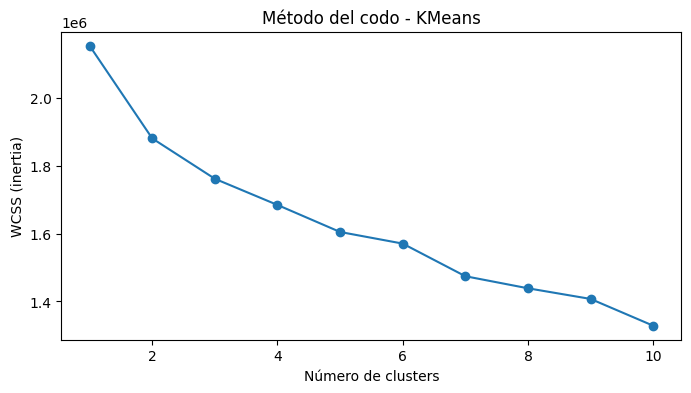

In [41]:
# Método del codo (codo de Jambu)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_clust)
    wcss.append(kmeans.inertia_)

# Plot del codo
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del codo - KMeans')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS (inertia)')
plt.show()

#### Se ve que entre 3 y 5 clusters podría ser un buen número (la curva empieza a doblar ahí). k = 4

### 6.2 Entrenamiento de KMeans con k=4

In [43]:
# Entrenamiento KMeans con k=4
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_clust)

# Añadimos la columna de cluster al dataframe
df_scaled['Cluster'] = clusters

## VII. Evaluación del modelo (no supervisado)


### 7.1 Distribución de clusters

C:\Users\Catussi\AppData\Local\Temp\ipykernel_16972\2438650684.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set2')


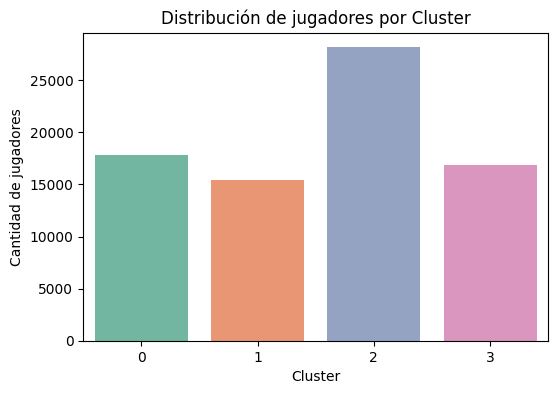

In [44]:
# Distribución de clusters
cluster_counts = df_scaled['Cluster'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set2')
plt.title('Distribución de jugadores por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Cantidad de jugadores')
plt.show()

### 7.2 Perfilado de clusters

In [45]:
# Seleccionamos columnas numéricas (sin PCA)
features = df_scaled.drop(columns=['Cluster', 'PCA1', 'PCA2'], errors='ignore')

# Promedios por cluster
cluster_profile = features.groupby(df_scaled['Cluster']).mean()

# Mostramos las primeras variables
cluster_profile.T.head(15)  # Puedes cambiar el número si quieres ver más o menos

Cluster,0,1,2,3
RoundWinner,0.759798,0.236274,0.524122,0.425396
MatchWinner,0.610149,0.382122,0.505791,0.336831
Survived,0.237398,0.726259,0.339491,0.391250
AbnormalMatch,0.000000,0.000000,0.000000,0.000000
TimeAlive,-0.290273,0.335121,-0.021710,0.036648
ScaledTimeAlive,-0.192741,0.587296,-0.175628,-0.040257
AvgCentroidDistance,-0.237157,0.184259,-0.003843,0.088643
TravelledDistance,-0.036694,0.090992,-0.023719,-0.004841
AvgRoundVelocity,0.025145,0.020642,-0.025358,-0.003148
AvgKillDistance,-0.273797,0.999137,-0.280952,-0.155450


### 7.3 Visualización de clusters con PCA

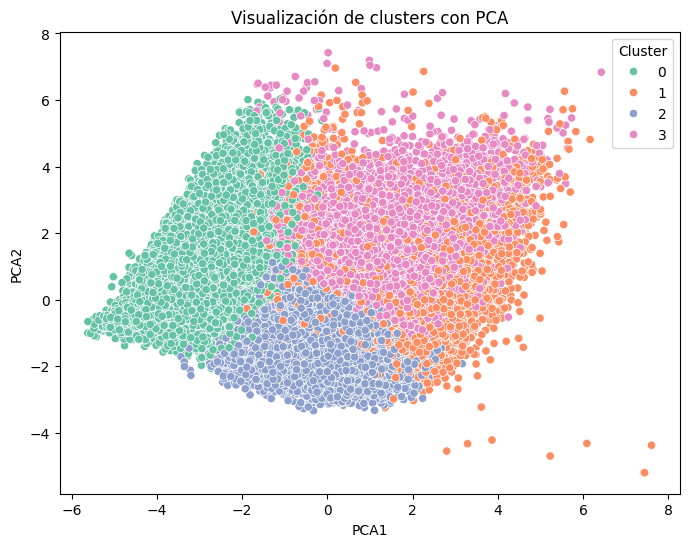

In [46]:
# Visualización con PCA 2D
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_clust)

df_scaled['PCA1'] = pca_components[:, 0]
df_scaled['PCA2'] = pca_components[:, 1]

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_scaled, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('Visualización de clusters con PCA')
plt.show()

### 7.4 Análisis e interpretación de clusters

La distribución de jugadores por cluster muestra una segmentación relativamente balanceada, con una mayor concentración en el Cluster 2 (aproximadamente 27 mil jugadores), mientras que los clusters 0, 1 y 3 presentan cantidades algo menores pero comparables.

El perfilado de los clusters revela diferencias interesantes en las características de los jugadores:

- **Cluster 0**: destaca por una alta proporción de victorias de ronda (`RoundWinner` ≈ 76%) y de match (`MatchWinner` ≈ 61%), aunque con baja supervivencia individual (`Survived` ≈ 24%). Esto sugiere jugadores más agresivos y de impacto colectivo, que quizás sacrifican supervivencia personal por el éxito del equipo.

- **Cluster 1**: muestra la supervivencia más alta (`Survived` ≈ 73%) y la mayor distancia promedio de kills (`AvgKillDistance` ≈ +0.99), lo que podría indicar un estilo de juego más defensivo o basado en roles de francotirador. Sin embargo, sus tasas de victoria de ronda y match son más bajas, lo que sugiere menor impacto en el resultado final.

- **Cluster 2**: es el más numeroso. Presenta valores intermedios en casi todas las métricas, representando un perfil de jugador promedio o equilibrado.

- **Cluster 3**: muestra características similares a Cluster 2, pero con valores algo inferiores en `MatchWinner` y `RoundWinner`, y con mayor presencia de armamento de soporte (`PrimaryAssaultRifle`, `PrimarySMG`), lo que podría indicar jugadores de rol de soporte o secundaria.

En conjunto, el análisis de clusters permite identificar perfiles diferenciados de jugadores en términos de estilo de juego, impacto en el equipo y supervivencia, lo que aporta valor para el diseño de estrategias de entrenamiento, balance de matchmaking y personalización de la experiencia de juego.


## VIII. Exploración de comportamientos anómalos

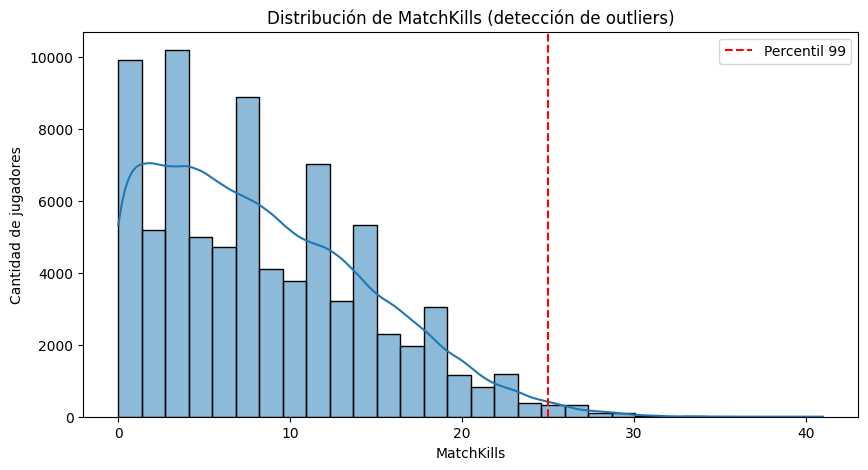

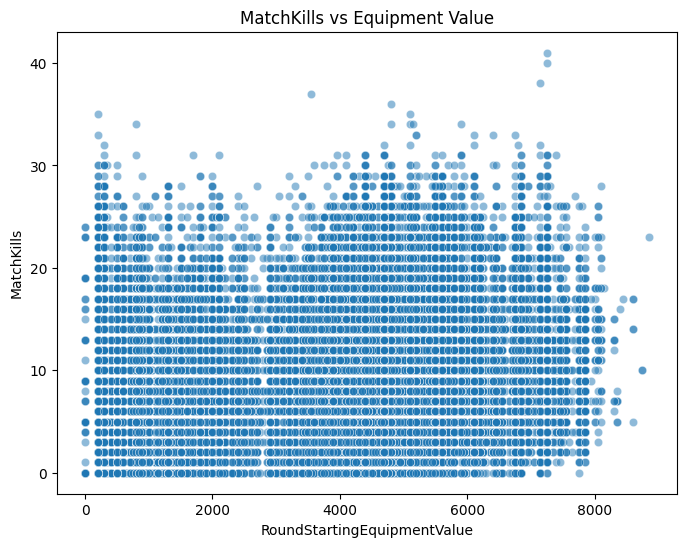

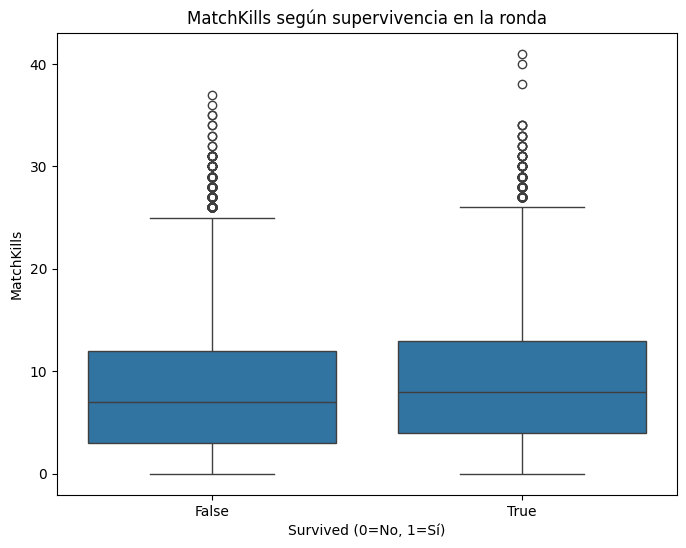

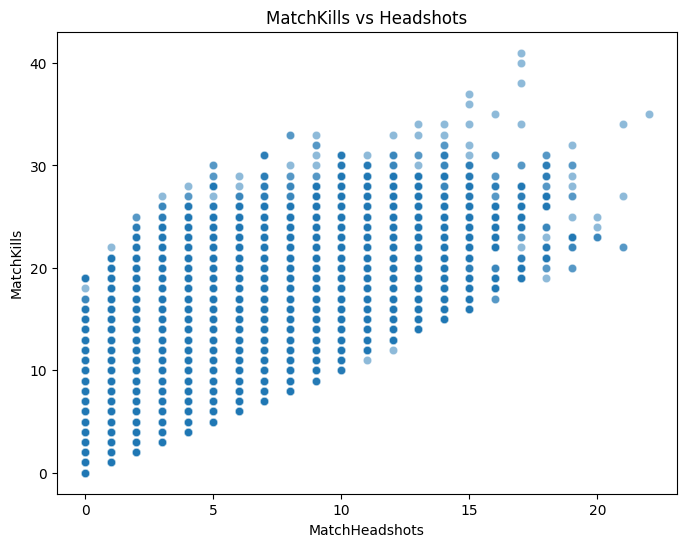

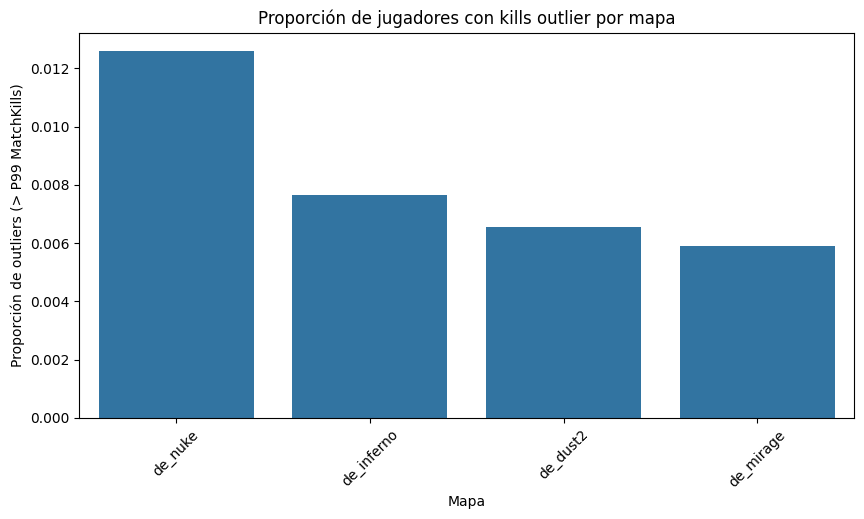

In [49]:
# Distribución de MatchKills (detección de outliers)
plt.figure(figsize=(10, 5))
sns.histplot(df['MatchKills'], bins=30, kde=True)
plt.axvline(df['MatchKills'].quantile(0.99), color='r', linestyle='--', label='Percentil 99')
plt.title('Distribución de MatchKills (detección de outliers)')
plt.xlabel('MatchKills')
plt.ylabel('Cantidad de jugadores')
plt.legend()
plt.show()

# Scatter equipment vs MatchKills
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='RoundStartingEquipmentValue', y='MatchKills', alpha=0.5)
plt.title('MatchKills vs Equipment Value')
plt.xlabel('RoundStartingEquipmentValue')
plt.ylabel('MatchKills')
plt.show()

# Scatter Survived vs MatchKills
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='MatchKills', data=df)
plt.title('MatchKills según supervivencia en la ronda')
plt.xlabel('Survived (0=No, 1=Sí)')
plt.ylabel('MatchKills')
plt.show()

# Relación Headshots vs MatchKills
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='MatchHeadshots', y='MatchKills', alpha=0.5)
plt.title('MatchKills vs Headshots')
plt.xlabel('MatchHeadshots')
plt.ylabel('MatchKills')
plt.show()

# Crear variable "outlier" si MatchKills > percentil 99
outlier_threshold = df['MatchKills'].quantile(0.99)
df['OutlierKills'] = df['MatchKills'] > outlier_threshold

# Proporción de outliers por mapa
outlier_rate = df.groupby('Map')['OutlierKills'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=outlier_rate.index, y=outlier_rate.values)
plt.title('Proporción de jugadores con kills outlier por mapa')
plt.ylabel('Proporción de outliers (> P99 MatchKills)')
plt.xlabel('Mapa')
plt.xticks(rotation=45)
plt.show()


Uno de los aspectos más relevantes en la gestión de comunidades competitivas en CSGO es la detección temprana de comportamientos atípicos que puedan estar asociados a uso de cheats o conductas antideportivas.

Si bien el dataset utilizado no incluye variables explícitas que indiquen la presencia de hacks (por ejemplo, VAC Bans), es posible explorar métricas del desempeño en partida que, combinadas, permiten identificar patrones anómalos.

En esta sección se analizaron:

- **Distribución extrema de kills por match**: se identificó el percentil 99 de la variable `MatchKills`, estableciendo un umbral (> 26 kills por match) para considerar jugadores con un desempeño fuera de lo común.
- **Relación entre kills y valor de equipamiento**: se analizaron casos de jugadores que logran elevadas cantidades de kills con un bajo equipamiento inicial. Este tipo de patrón puede ser indicativo de uso de técnicas externas, ya que el rendimiento supera lo que sería esperable con dicho equipamiento.
- **Relación entre kills y supervivencia**: se exploraron combinaciones de jugadores que sobreviven una gran proporción de rondas y logran un número de kills anormalmente alto. En el juego competitivo normal, un balance entre riesgo y resultado es más habitual.
- **Relación entre kills y headshots**: se identificaron jugadores con tasas de headshots anormalmente altas en relación al número de kills, un posible indicador de uso de aimbots.
- **Distribución de jugadores con kills outliers por mapa**: se observó que ciertos mapas, en particular `de_nuke`, presentan una mayor concentración de jugadores con rendimiento atípico, lo que puede estar relacionado con características del mapa que favorecen ciertos exploits o estilos de juego.

Los resultados muestran que:

- Un subconjunto reducido de jugadores alcanza niveles de kills muy por encima del promedio (percentil 99 > 26 kills).
- Existen jugadores con un ratio kills/equipamiento atípico, incluso obteniendo más de 30 kills con bajo equipamiento.
- Las combinaciones de supervivencia alta + kills elevadas son poco frecuentes y concentradas en ciertos perfiles.
- Algunos jugadores exhiben tasas de headshots desproporcionadamente altas respecto al total de kills, lo que es un patrón clásico de comportamientos automatizados.
- El mapa `de_nuke` muestra la mayor proporción de jugadores con kills outlier, lo cual puede señalar condiciones particulares que facilitan exploits.

Si bien estos análisis no permiten afirmar de forma concluyente la presencia de cheats, sí sientan una base robusta para futuros desarrollos de modelos automatizados de detección de comportamientos anómalos en CSGO, especialmente si se complementan con datos adicionales de sistemas anti-cheat o reportes de la comunidad.

La integración de este tipo de análisis exploratorio en plataformas de juego competitivo permitiría mejorar los sistemas de prevención y contribuir a un entorno más justo y equilibrado para los jugadores.


## IX. Análisis estratégico de desempeño

### 9.1 Análisis de rendimiento por mapa

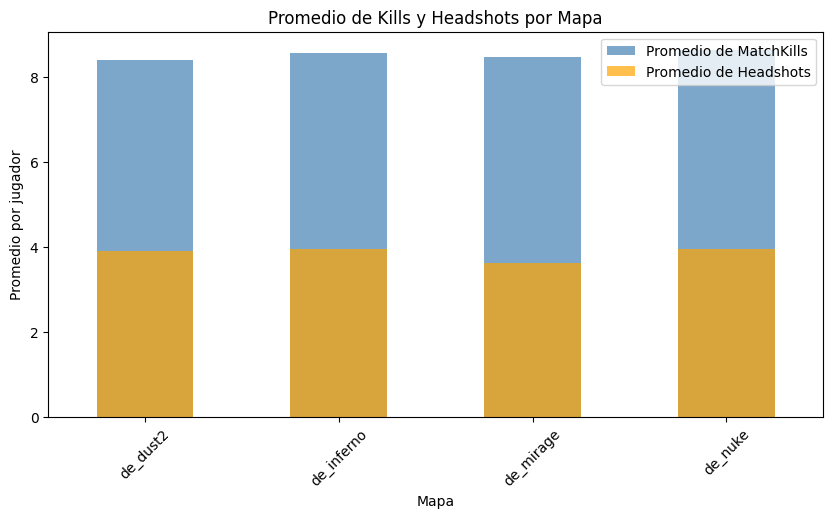

In [50]:
# Promedio de kills y headshots por mapa
kills_per_map = df.groupby('Map')['MatchKills'].mean()
headshots_per_map = df.groupby('Map')['MatchHeadshots'].mean()

# Plot
plt.figure(figsize=(10, 5))
kills_per_map.plot(kind='bar', color='steelblue', alpha=0.7, label='Promedio de MatchKills')
headshots_per_map.plot(kind='bar', color='orange', alpha=0.7, label='Promedio de Headshots')
plt.title('Promedio de Kills y Headshots por Mapa')
plt.ylabel('Promedio por jugador')
plt.xlabel('Mapa')
plt.xticks(rotation=45)
plt.legend()
plt.show()

El primer análisis compara el desempeño de los jugadores en distintos mapas. Se calcularon el promedio de kills (`MatchKills`) y headshots (`MatchHeadshots`) por jugador en cada escenario.

Los resultados muestran que los mapas `de_inferno` y `de_mirage` presentan un leve incremento en el rendimiento ofensivo, lo cual podría atribuirse a la configuración del entorno, disponibilidad de líneas de visión, o equilibrio táctico del mapa. `de_dust2`, conocido por su diseño simétrico, mostró cifras ligeramente más conservadoras, mientras que `de_nuke`, a pesar de ser más técnico, mantiene un buen promedio de headshots.

Este análisis puede ayudar a identificar qué mapas requieren más preparación o adaptaciones tácticas según los patrones de rendimiento.

### 9.2 Comparativa Terrorist vs Counter-Terrorist

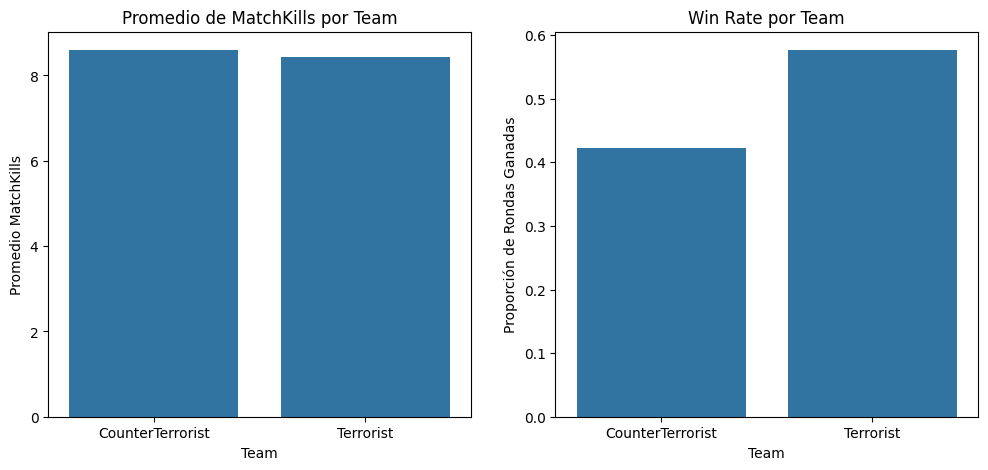

In [51]:
# Promedio de kills por Team
kills_team = df.groupby('Team')['MatchKills'].mean()

# Win rate por Team
round_win_rate = df.groupby('Team')['RoundWinner'].mean()

# Plot
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Kills
sns.barplot(x=kills_team.index, y=kills_team.values, ax=ax[0])
ax[0].set_title('Promedio de MatchKills por Team')
ax[0].set_ylabel('Promedio MatchKills')

# Round win rate
sns.barplot(x=round_win_rate.index, y=round_win_rate.values, ax=ax[1])
ax[1].set_title('Win Rate por Team')
ax[1].set_ylabel('Proporción de Rondas Ganadas')

plt.show()


El análisis por bando (`Team`) permite evaluar el balance de juego entre Terrorist y Counter-Terrorist. Aunque el número promedio de kills es muy similar en ambos lados, se observa una diferencia significativa en el win rate por ronda: el equipo Terrorist presenta una tasa de victorias claramente superior.

Este hallazgo puede tener múltiples interpretaciones: ventajas contextuales del lado Terrorist en ciertos mapas, mayor efectividad en economía o simplemente patrones de estilo de juego de los jugadores analizados. En cualquier caso, la diferencia observada sugiere que existe un margen de mejora para equilibrar las rondas desde el punto de vista defensivo (CT).

### 9.3 Efecto del equipamiento en el rendimiento

C:\Users\Catussi\AppData\Local\Temp\ipykernel_16972\1375255898.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  kills_by_equip = df.groupby('EquipBin')['MatchKills'].mean()


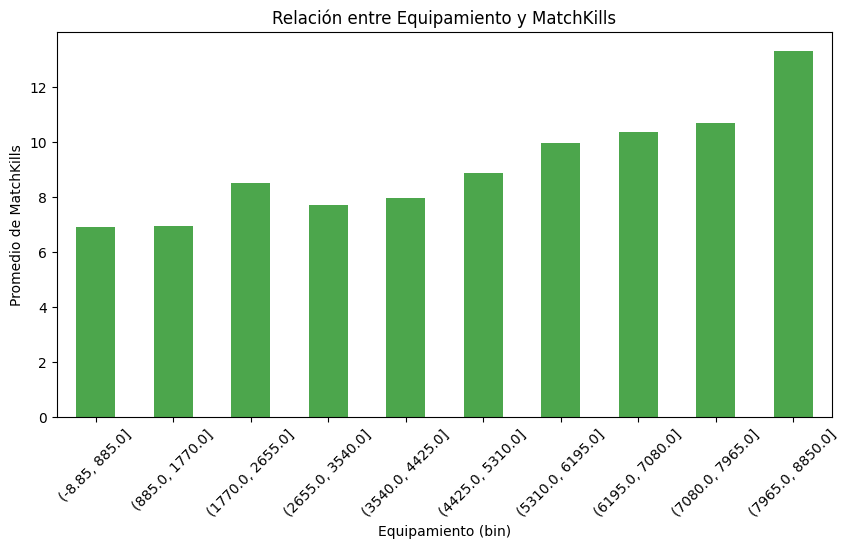

In [52]:
# Agrupar equipment value en bins
df['EquipBin'] = pd.cut(df['RoundStartingEquipmentValue'], bins=10)

# Promedio kills por rango de equipamiento
kills_by_equip = df.groupby('EquipBin')['MatchKills'].mean()

# Plot
kills_by_equip.plot(kind='bar', figsize=(10, 5), color='green', alpha=0.7)
plt.title('Relación entre Equipamiento y MatchKills')
plt.ylabel('Promedio de MatchKills')
plt.xlabel('Equipamiento (bin)')
plt.xticks(rotation=45)
plt.show()


Finalmente, se analizó cómo el valor de equipamiento inicial (`RoundStartingEquipmentValue`) influye en el número de kills en el match.

Se aplicó una segmentación por bins y se observó un patrón creciente claro: a mayor equipamiento, mayor rendimiento ofensivo promedio. No obstante, este efecto no es lineal. Los incrementos de rendimiento tienden a estabilizarse en los tramos más altos de equipamiento, lo cual sugiere la existencia de un umbral de eficiencia. 

Este tipo de análisis puede ser útil para optimizar decisiones de compra dentro del juego competitivo, ajustando la inversión en armamento según la situación estratégica de cada ronda.

En conjunto, estos análisis permiten identificar patrones significativos del juego competitivo en CSGO que no solo complementan los modelos predictivos desarrollados, sino que también abren líneas para la toma de decisiones tácticas, balanceo de mapas, y el diseño de estrategias más eficientes para mejorar el rendimiento de los equipos.


## X. Justificación del modelo y recomendaciones de negocio

### Justificación de la selección del modelo

Durante el desarrollo del proyecto, se evaluaron múltiples modelos de Machine Learning para abordar distintas problemáticas en el contexto de CSGO:

- Para predicciones de tipo regresión (cantidad de kills, distancia media de kills), los modelos de **Random Forest Regressor** demostraron consistentemente el mejor desempeño, logrando altos valores de R² y bajos errores (MAE, RMSE). Este comportamiento es coherente con las capacidades del modelo para capturar relaciones no lineales y gestionar datasets con múltiples variables.

- En las tareas de clasificación (predicción de supervivencia en la ronda, equipo ganador de ronda o de match), nuevamente el **Random Forest Classifier** se destacó como la opción más robusta, mostrando la mejor combinación de accuracy, precision, recall y F1-score. Su capacidad de manejar interacciones complejas entre las variables resultó muy adecuada para la naturaleza del dataset.

- En cuanto al modelamiento no supervisado, el análisis de clusters basado en **KMeans** permitió segmentar de manera razonable a los jugadores en perfiles diferenciados, con una separación visible en el espacio PCA y diferencias claras en variables clave (kills, headshots, supervivencia, equipamiento).

Por tanto, la elección de modelos basados en árboles (Random Forest) y segmentación KMeans se fundamenta directamente en los resultados observados y en su capacidad demostrada para capturar la complejidad de los datos de juego.

### Recomendaciones y proyecciones

A partir de los hallazgos del proyecto, se proponen las siguientes aplicaciones prácticas y proyecciones:

- **Optimización de coaching y estrategias**: Los modelos predictivos permiten anticipar el rendimiento esperado de un jugador según sus características, facilitando la personalización de estrategias y el diseño de entrenamientos más efectivos.

- **Balanceo de equipos**: Las predicciones y los perfiles de clusters pueden utilizarse para equilibrar equipos en partidas competitivas, reduciendo las desigualdades y aumentando la calidad de las partidas.

- **Detección temprana de comportamientos atípicos**: El análisis exploratorio desarrollado sienta las bases para futuros sistemas automáticos de detección de jugadores sospechosos (anti-cheat), complementando la supervisión humana y los sistemas existentes.

- **Ajustes en el diseño de mapas**: Los insights obtenidos sobre las diferencias de desempeño por mapa o por bando pueden informar decisiones en el diseño de mapas o ajustes de balance en futuras actualizaciones del juego.

- **Ampliación a datasets más ricos**: A futuro, el mismo enfoque podría aplicarse sobre datasets que incluyan variables temporales (por ronda), información de armas específicas, historial de baneos, o incluso datos biométricos, permitiendo modelos aún más precisos.

En resumen, el proyecto ha demostrado cómo la aplicación de técnicas de Machine Learning puede aportar un valor tangible en el análisis, la gestión y la mejora de la experiencia de juego competitiva en CSGO, abriendo nuevas posibilidades para su uso tanto en ámbitos de eSports profesionales como en comunidades de jugadores amateur.